# Kinetic Changepoints Examples

## Load the changepoint functions

In [1]:
include("../src/KineticChangepoints.jl")

getchangepoints (generic function with 3 methods)

## Non-interactive mode

Here we run the changepoint method on an example file containing real DNA replication trajectories, and have it output a file of segments for us. Input arguments are the source file name, the intended name of the ouput file, the global sigma variable, the confidence level, the separator (e.g. ',' for comma or '&#92;t' for tab) and the order of the time, nucleotides(/position) and trajectory columns.

In [2]:
getchangepoints("testdata.csv", "outputsegments.csv", 100, 0.99, ',', [6, 8, 5]);

## Manual mode

This may be useful if you wish to manipulate your input data using Julia somehow. Otherwise, use the non-interactive mode. Load the test data.

In [3]:
testdata = readdlm("testdata.csv", ',');

In [4]:
size(testdata)

(299691, 8)

What columns are in our test data? Remember to count from 1 in Julia.

In [5]:
testdata[1,:]

8-element Array{Any,1}:
 " "          
 "x"          
 "y"          
 "slice"      
 "trajectory" 
 "time"       
 "transverse" 
 "nucleotides"

Convert the array. Tell it the order in which the time, position (nucleotides) and grouping (trajectory) columns are found.

In [6]:
testdata2 = convert_array(testdata, [6, 8, 5]);

In [7]:
size(testdata2)

(299690, 3)

Now find the change points using batch_table, which takes as input the array, the sigma value (globally applied to all trajectories in the array) and the confidence level. The column names in the output segments table are self-explanatory, keep in mind that the X_index counts from 1.

In [8]:
segtable = batch_table(testdata2, 100, 0.99)

4340×11 Array{Any,2}:
     "trajectory"        "X_index1"  …    "duration"      "length"
  227.0                 1               21.25          -26.6374   
  227.0                86               40.25          -40.7131   
  227.0               247                4.25         -315.996    
  227.0               264               12.75          263.67     
  227.0               315            …  29.0           157.339    
  227.0               431               22.75          136.037    
  227.0               522                9.5           -76.5916   
  227.0               560               12.5           -33.5915   
  227.0               610               18.25         -273.595    
  227.0               683            …   7.75         -294.491    
  227.0               714               26.75          130.749    
  227.0               821               24.5           304.73     
    ⋮                                ⋱                   ⋮        
 8647.0            298881               

In [9]:
segtable[1,:]

11-element Array{Any,1}:
 "trajectory"
 "X_index1"  
 "x_index2"  
 "x1"        
 "y1"        
 "x2"        
 "y2"        
 "A"         
 "B"         
 "duration"  
 "length"    

How fast is it?

In [10]:
@time batch_table(testdata2, 100, 0.99);

 10.625833 seconds (347.68 k allocations: 21.256 MiB, 0.07% gc time)


Pretty fast.

## Plotting

You are probably better off making plots in R/Python/Matlab/whatever.

In [11]:
Pkg.add("PyPlot"); #Only ever need to run tihs once. 
#Also need to have matplotlib installed in Python. E.g. in python do: conda install matplotlib.

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [12]:
using PyPlot

In [13]:
startend = startendtable(testdata2);

In [14]:
trajno = 13; #The ordinal number of the trajectory (not its actual number)

In [15]:
trajsegs = segtable[segtable[:,1] .== startend[trajno,1], :];

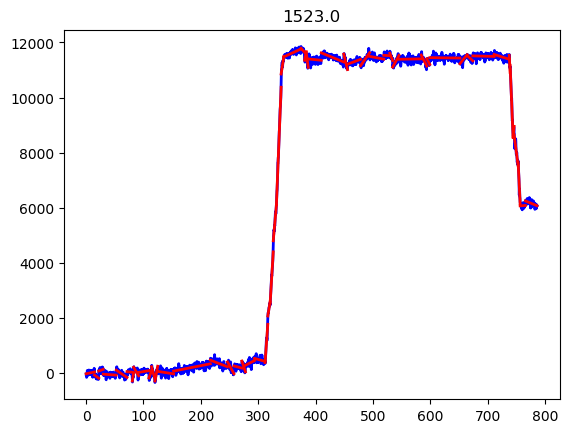

PyObject <matplotlib.text.Text object at 0x0000000059EDD278>

In [16]:
x = testdata2[startend[trajno,2]:startend[trajno,2] + startend[trajno,3] - 1, 1]; 
y = testdata2[startend[trajno,2]:startend[trajno,2] + startend[trajno,3] - 1, 2];
plot(x, y, color="blue", linewidth=2.0, linestyle="-")
for i in 1:length(trajsegs[:,1])
    plot([trajsegs[i,4], trajsegs[i,6]], [trajsegs[i,5], trajsegs[i,7]], color="red", linewidth=2.0, linestyle="-")
end
title(startend[trajno,1])

Scatter plot showing all the segments for all the trajectories, with time on the x-axis and segment length on the y-axis. You can see where replication starts at about 300 seconds.

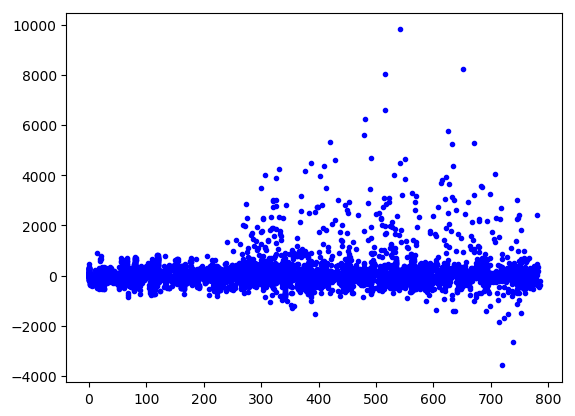

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000005A2D9D30>

In [17]:
x = segtable[2:end,4]
y = segtable[2:end,11];
plot(x, y, color = "blue", ".")